Most jet tools are incorporated into CMSSW via the [JetToolbox](https://twiki.cern.ch/twiki/bin/view/CMS/JetToolbox). General information can be found on the previous link.

A config file `Analysis/JMEDAS/scripts/ClusterWithToolboxAndMakeHistos.py` has been provided which uses the jet toolbox to produce three additional jet collections. Take a look at this file and you will see:

```python
from Analysis.JetToolbox.jetToolbox_cff import *

# updating slimmedJets (ak4 CHS jets) from miniAOD
jetToolbox( process, 'ak4', 'ak4UpdJetSubs', 'noOutput',
        dataTier="miniAOD",
        updateCollection='slimmedJets',
        JETCorrPayload='AK4PFchs',
        postFix='Updated',
        bTagDiscriminators=btagDiscAK4
        )

# AK R=0.4 jets from CHS inputs
jetToolbox( process, 'ak4', 'ak4JetSubs', 'noOutput',
  dataTier="miniAOD",
  PUMethod='CHS',
#  JETCorrPayload = 'AK4PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
  addPUJetID=True,
  addQGTagger=True,
  Cut='pt>30 && abs(eta)<2.5'
)

# AK R=0.4 jets from Puppi inputs
jetToolbox( process, 'ak4', 'ak4JetSubs', 'noOutput',
  dataTier="miniAOD",
  PUMethod='Puppi',
#  JETCorrPayload = 'AK4PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
  Cut='pt>30 && abs(eta)<2.5'
)

# AK R=0.4 jets from PF inputs
jetToolbox( process, 'ak4', 'ak4JetSubs', 'noOutput',
  dataTier="miniAOD",
  PUMethod='Plain',
#  JETCorrPayload = 'AK4PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
  Cut='pt>30 && abs(eta)<2.5'
)



# updating slimmedAK8Jets (ak8 puppi jets) from miniAOD
jetToolbox( process, 'ak8', 'ak8UpdJetSubs', 'noOutput',
        dataTier="miniAOD",
        PUMethod='Puppi',
        updateCollection='slimmedJetsAK8',
        JETCorrPayload='AK8PFPuppi',
        postFix='Updated',
        bTagDiscriminators=btagDiscAK8
        )

# AK R=0.8 jets from CHS
jetToolbox( process, 'ak8', 'ak8JetSubs', 'noOutput',
  dataTier="miniAOD",
  Cut="pt>170 && abs(eta)<2.5",
  PUMethod='CHS',
  addPruning=True, addSoftDrop=True ,           # add basic grooming
  addTrimming=True, addFiltering=True,
  addSoftDropSubjets=True,
  addNsub=True, maxTau=4,                       # add Nsubjettiness tau1, tau2, tau3, tau4
  JETCorrPayload = 'AK8PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute'],
)

# AK R=0.8 from PUPPI
jetToolbox( process, 'ak8', 'ak8JetSubs', 'noOutput',
  dataTier="miniAOD",
  PUMethod='Puppi',
  Cut="pt>170 && abs(eta)<2.5",
  addPruning=True, addSoftDrop=True ,           # add basic grooming
  addTrimming=True, addFiltering=True,
  addSoftDropSubjets=True,
  addNsub=True, maxTau=4,                       # add Nsubjettiness tau1, tau2, tau3, tau4
  addEnergyCorrFunc=True,
  #JETCorrPayload = 'AK8PFPuppi', JETCorrLevels = ['L2Relative', 'L3Absolute']
)

# CA R=0.8 jets from CHS
jetToolbox( process, 'ca8', 'ca8JetSubs', 'noOutput',
  Cut="pt>170 && abs(eta)<2.5",
  dataTier="miniAOD",
  PUMethod='CHS',
  addPruning=True, addSoftDrop=True ,           # add basic grooming
  JETCorrPayload = 'AK8PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
)

# KT R=0.8 jets from CHS
jetToolbox( process, 'kt8', 'kt8JetSubs', 'noOutput',
  Cut="pt>170 && abs(eta)<2.5",
  dataTier="miniAOD",
  PUMethod='CHS',
  addPruning=True, addSoftDrop=True ,           # add basic grooming
  JETCorrPayload = 'AK8PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
)

# KT R=0.8 jets from CHS
jetToolbox( process, 'kt8', 'kt8JetSubs', 'noOutput',
  dataTier="miniAOD",
  Cut="pt>170 && abs(eta)<2.5",
  PUMethod='CHS',
  addPruning=True, addSoftDrop=True ,           # add basic grooming
  JETCorrPayload = 'AK8PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
)

# AK R=0.8 jets from Puppi, modified Softdrop
jetToolbox( process, 'ak8', 'ak8JetSubs', 'noOutput',
  dataTier="miniAOD",
  Cut="pt>170 && abs(eta)<2.5",
  PUMethod='Puppi',
  postFix='modSD',
  addSoftDrop=True , betaCut=1,           # add basic grooming
  JETCorrPayload = 'AK8PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
)

# AK R=0.8 jets from SK
jetToolbox( process, 'ak8', 'ak8JetSubs', 'noOutput',
  dataTier="miniAOD",
  Cut="pt>170 && abs(eta)<2.5",
  PUMethod='SK',
  addPruning=True, addSoftDrop=True ,           # add basic grooming
  JETCorrPayload = 'AK8PFchs', JETCorrLevels = ['L2Relative', 'L3Absolute']
)


```

The snippet above first imports the jet toolbox. Then it configures the jet toolbox to produce various new jet collections which are not in the miniAOD by default. What parameters are varied for each jet collection?

You can run the config file via: 

In [ ]:
### RUN THIS CELL ONLY IF YOU ARE USING SWAN 
import os

##### REMEMBER TO MANUALLY COPY THE PROXY TO YOUR CERNBOX FOLDER AND TO MODIFY THE NEXT LINE
os.environ['X509_USER_PROXY'] = '/eos/home-X/Y/tmp/x509up_u0000'
if os.path.isfile(os.environ['X509_USER_PROXY']): pass
else: print("os.environ['X509_USER_PROXY'] ",os.environ['X509_USER_PROXY'])
os.environ['X509_CERT_DIR'] = '/cvmfs/cms.cern.ch/grid/etc/grid-security/certificates'
os.environ['X509_VOMS_DIR'] = '/cvmfs/cms.cern.ch/grid/etc/grid-security/vomsdir'

In [2]:
%%bash
cmsRun $CMSSW_BASE/src/Analysis/JMEDAS/scripts/ClusterWithToolboxAndMakeHistos.py

|---- jetToolbox: Initializing collection... (with postfix Updated)
|---- jetToolBox: Adding these btag discriminators: ['pfCombinedInclusiveSecondaryVertexV2BJetTags', 'pfCombinedCvsLJetTags', 'pfCombinedCvsBJetTags', 'pfDeepCSVJetTags:probb', 'pfDeepCSVJetTags:probbb', 'pfDeepCSVJetTags:probc', 'pfDeepCSVJetTags:probudsg', 'pfDeepFlavourJetTags:probb', 'pfDeepFlavourJetTags:probbb', 'pfDeepFlavourJetTags:problepb', 'pfDeepFlavourJetTags:probc', 'pfDeepFlavourJetTags:probuds', 'pfDeepFlavourJetTags:probg'] in the jet collection.
|---- jetToolBox: JETTOOLBOX IS UPDATING slimmedJets collection
|---- jetToolBox: Applying these corrections: ('AK4PFchs', ['L1FastJet', 'L2Relative', 'L3Absolute'], 'None')
|---- jetToolBox: Creating selectedPatJetsAK4PFCHSUpdated collection.
|---- jetToolbox: Initializing collection... (with postfix )
|---- jetToolBox: Adding these btag discriminators: ['pfCombinedInclusiveSecondaryVertexV2BJetTags', 'pfCombinedCvsLJetTags', 'pfCombinedCvsBJetTags'] in the j

**************************************************************
b tagging needs to be run on uncorrected jets. Hence, the JECs
will first be undone for 'updatedPatJetsAK4PFCHSUpdated' and then applied to
'updatedPatJetsTransientCorrectedAK4PFCHSUpdated'.
**************************************************************
-------------------------------------------------------------------
 Info: To run c tagging on MiniAOD, c-tag-specific IVF secondary
       vertices will be remade.
-------------------------------------------------------------------
-------------------------------------------------------------------
 Info: To run c tagging on MiniAOD, c-tag-specific IVF secondary
       vertices will be remade.
-------------------------------------------------------------------
-------------------------------------------------------------------
 Info: To run c tagging on MiniAOD, c-tag-specific IVF secondary
       vertices will be remade.
----------------------------------------------------

The config also runs an analyzer that produces histograms. The analyzer accesses each new jet collection as follows. Jet substructure variables are stored as "userFloats" associated with the `pat::Jet` object.

```c++
  //--------------------------------------------------------------------------------------------
  // AK R=0.8 CHS jets - from toolbox

  edm::Handle<pat::JetCollection> AK8CHS;
  iEvent.getByToken(ak8PFCHSjetToken_, AK8CHS);

  edm::Handle<pat::JetCollection> AK8CHSsub;
  iEvent.getByToken(ak8PFCHSSoftDropSubjetsToken_, AK8CHSsub);

  int count_AK8CHS = 0;
  for (const pat::Jet &ijet : *AK8CHS) {  
    count_AK8CHS++;
    if (count_AK8CHS>=2) break; 
    double pt           = ijet.pt();
    double mass         = ijet.mass();
    double rapidity     = ijet.rapidity();
    double prunedMass   = ijet.userFloat("ak8PFJetsCHSPrunedMass");
    double trimmedMass  = ijet.userFloat("ak8PFJetsCHSTrimmedMass");
    double filteredMass = ijet.userFloat("ak8PFJetsCHSFilteredMass");
    double softDropMass = ijet.userFloat("ak8PFJetsCHSSoftDropMass");
    double tau1         = ijet.userFloat("NjettinessAK8CHS:tau1");
    double tau2         = ijet.userFloat("NjettinessAK8CHS:tau2");
    double tau3         = ijet.userFloat("NjettinessAK8CHS:tau3");
    double tau4         = ijet.userFloat("NjettinessAK8CHS:tau4");
    double ndau         = ijet.numberOfDaughters();
    double tau21 = 99;
    double tau32 = 99;
    if (tau1!=0) tau21 = tau2/tau1;
    if (tau2!=0) tau32 = tau3/tau2;
   
    double mostMassiveSDsubjetMass = 0;
    for (const pat::Jet &isub : *AK8CHSsub) {  
      double subjetEta      = isub.eta();
      double subjetPhi      = isub.phi();
      double subjetMass     = isub.mass();
      double deltaRsubjetJet = deltaR(ijet.eta(), ijet.phi(), subjetEta, subjetPhi);
      if (deltaRsubjetJet<0.8){
        if (verbose) cout<<"matched subjet with mass "<< subjetMass<<endl;
        if (subjetMass > mostMassiveSDsubjetMass) mostMassiveSDsubjetMass = subjetMass;
      }
    }
  }
```

Exercise: compare the histograms stored in the output root file.
* How does the jet area compare for CA, KT, AK R=0.8 jets?
* How does the jet mass compare for jets of different radius?
* At what pT do AK8 top jets merge? How about AK12?

To help you get started, we'll open the file, list the histograms available, and plot a few of them.

In [ ]:
import ROOT
f = ROOT.TFile.Open("JetClusterHistos_ZP3.root")
fdir = f.Get("ana")
fdir.ls()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


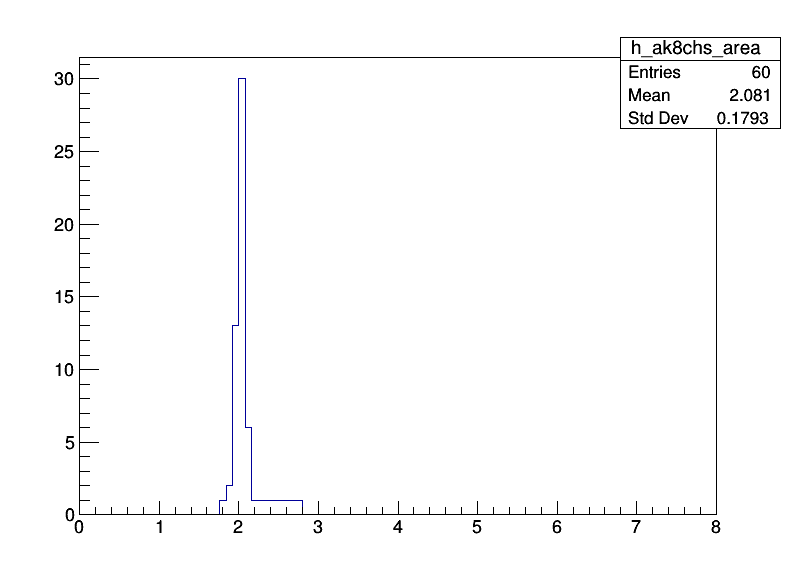

In [6]:
h_ak8_area = fdir.Get("h_ak8chs_area")
c = ROOT.TCanvas('c', 'c', 800, 600)
h_ak8_area.Draw()
c.Draw()